# 4-1.

In [22]:
import seaborn as sns

df = sns.load_dataset('Penguins')
df = df.dropna()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [24]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [25]:
pen_input = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
pen_input.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [26]:
pen_target = df[['species']]

In [27]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(pen_input, pen_target)

In [28]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

1.0
0.9880952380952381


C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [31]:
kn.predict_proba(test_scaled)

array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0.8, 0.2, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0.4, 0.6, 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0.8, 0.2, 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0.8, 0.2, 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0.2, 0.8, 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0.8, 0.2, 0. ],
       [1. , 0. 

In [32]:
ag_indexes = (train_target == 'Adelie') | (train_target == 'Gentoo')

train_ag = train_scaled[ag_indexes['species']]
target_ag = train_target[ag_indexes['species']]

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_ag, target_ag)

print(lr.predict_proba(train_ag[:5]).round(3))

[[0.025 0.975]
 [0.967 0.033]
 [0.002 0.998]
 [0.014 0.986]
 [0.002 0.998]]


C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
lr.coef_

array([[ 1.08891385, -2.09018928,  1.44148646,  1.17302103]])

In [37]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9919678714859438
0.9880952380952381


C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
print(lr.predict_proba(test_scaled[:5]).round(3))

[[0.006 0.991 0.003]
 [0.001 0.002 0.997]
 [0.942 0.058 0.   ]
 [0.004 0.007 0.989]
 [0.999 0.001 0.   ]]


In [50]:
lr.coef_.shape

(3, 4)

# 4-2.

In [43]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9919678714859438
0.9880952380952381


C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [51]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9799196787148594
0.9761904761904762


C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 5-1.

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

1.0
0.9166666666666666


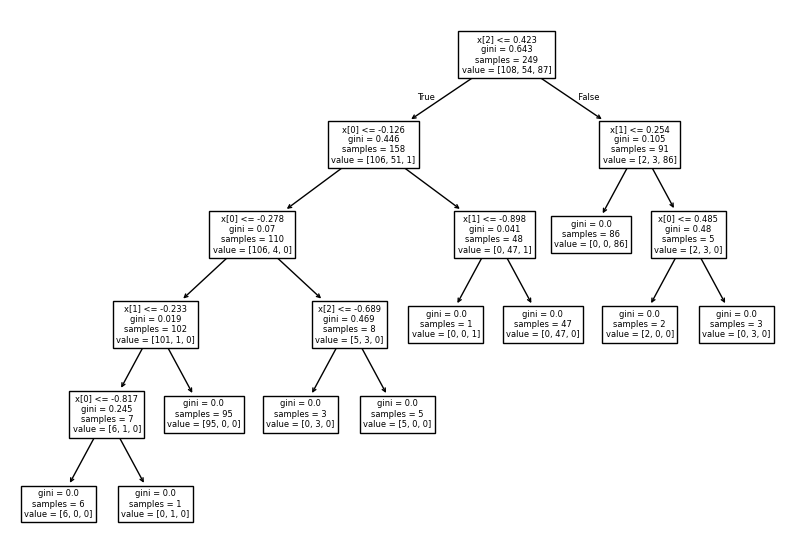

In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

In [48]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

1.0
0.9285714285714286


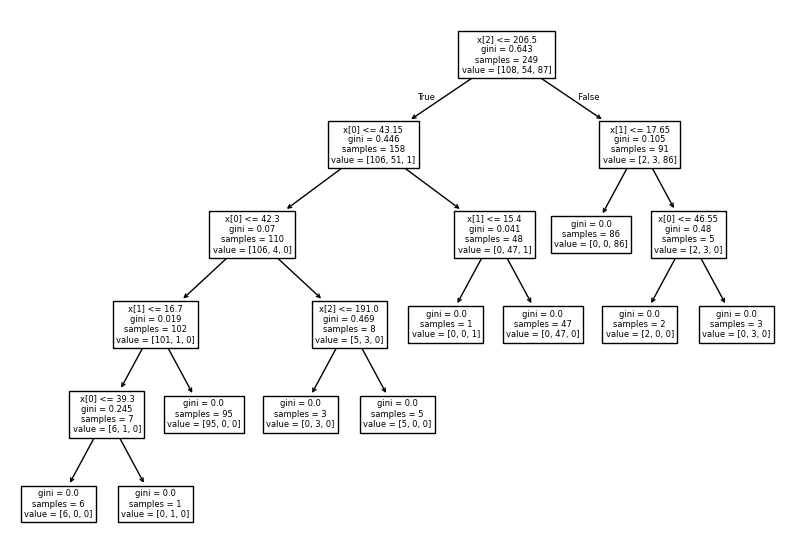

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

# 5-2.

In [78]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target)

In [79]:
print(sub_input.shape)
print(val_input.shape)
print(test_input.shape)

(186, 4)
(63, 4)
(84, 4)


In [80]:
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

1.0
0.9841269841269841


In [81]:
print(dt.score(test_input, test_target))

0.9166666666666666


In [82]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.0031724 , 0.00341153, 0.00315762, 0.00292659, 0.00209069]), 'score_time': array([0.00350142, 0.00399494, 0.00311589, 0.00223398, 0.00232697]), 'test_score': array([0.94      , 0.98      , 0.94      , 1.        , 0.93877551])}


In [83]:
from sklearn.model_selection import GridSearchCV

params = {
    'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
}

In [85]:
gs = GridSearchCV(dt, params, n_jobs=-1)

In [86]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [87]:
gs.best_estimator_

DecisionTreeClassifier(min_impurity_decrease=0.0004)

In [106]:
# 데이터 불러오기
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [108]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [109]:
data = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
target = df[['species']]

In [111]:
# 데이터 섞기
from sklearn.model_selection import train_test_split

In [112]:
train_input, test_input, train_target, test_target = train_test_split(data, target)

In [114]:
# 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [115]:
# 최근접이웃 모델
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9732142857142857
0.9473684210526315


C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [117]:
# predict
kn.predict(test_scaled)

array(['setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica'], dtype=object)

In [118]:
kn.predict_proba(test_scaled)

array([[1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

In [119]:
# 로지스틱 회귀
# 두개만 뽑아내기

df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [121]:
indexes = (train_target == 'versicolor') | (train_target == 'virginica')
train_v = train_scaled[indexes['species']]
target_v = train_target[indexes['species']]

In [122]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_v, target_v)

print(lr.predict_proba(train_v)[:5])

[[0.76855537 0.23144463]
 [0.90980984 0.09019016]
 [0.0253635  0.9746365 ]
 [0.08354445 0.91645555]
 [0.33493635 0.66506365]]


C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [124]:
# coef
lr.coef_

array([[ 0.22729455, -0.1976663 ,  1.95318884,  2.9378058 ]])

In [127]:
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9642857142857143
0.9210526315789473


C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
lr.predict_proba(test_scaled[:5]).round(3)

array([[0.971, 0.029, 0.   ],
       [0.041, 0.862, 0.097],
       [0.   , 0.018, 0.982],
       [0.941, 0.059, 0.   ],
       [0.   , 0.015, 0.985]])

In [126]:
# shape
lr.coef_.shape

(3, 4)

In [131]:
# 확률적 경사 하강법
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier()
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9553571428571429
0.9210526315789473


C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
# 이어서 돌리기
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9464285714285714
0.9210526315789473


C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
# 결정트리
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

1.0
0.9210526315789473


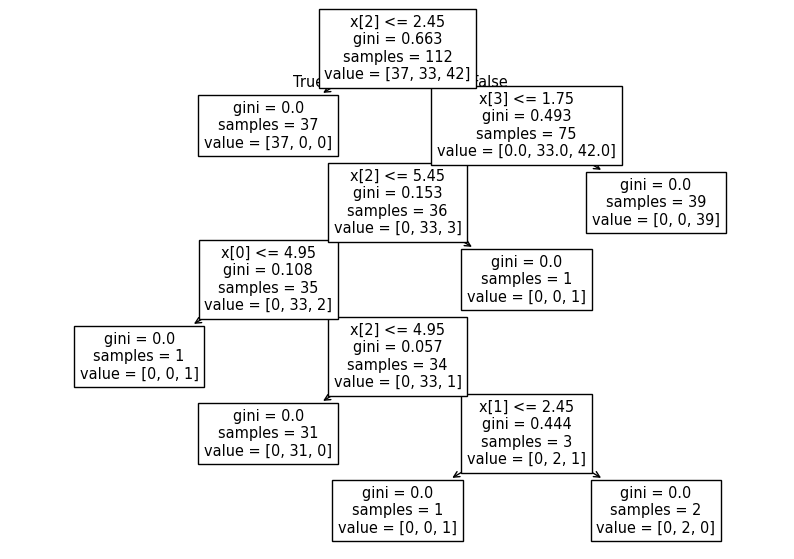

In [143]:
# 그림 그리기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

In [145]:
# 검증 세트 만들기
sub_input, val_input, sub_target, val_target = train_test_split(train_scaled, train_target)

dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

1.0
0.8928571428571429


In [147]:
print(dt.score(test_scaled, test_target))

0.9736842105263158


In [148]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target)

dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

1.0
0.9642857142857143


In [150]:
print(dt.score(test_input, test_target))

0.9736842105263158


In [151]:
print(sub_input.shape)
print(val_input.shape)
print(test_input.shape)

(84, 4)
(28, 4)
(38, 4)


In [152]:
# 교차 검증
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00244164, 0.00200677, 0.00209403, 0.00194407, 0.00249982]), 'score_time': array([0.00258303, 0.00291872, 0.00456405, 0.00349069, 0.00280881]), 'test_score': array([0.86956522, 1.        , 0.86363636, 1.        , 0.86363636])}


In [155]:
# 그리드 서치
from sklearn.model_selection import GridSearchCV

parmas = {
    'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
}

gs = GridSearchCV(dt, params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [157]:
gs.best_estimator_

DecisionTreeClassifier(min_impurity_decrease=0.0003)